## Notebook for data example

In [2]:
%load_ext autoreload
%autoreload 2

In [43]:
from utils import *
from urllib import request
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

### Get urls
---
`get_urls` 함수를 이용하여 기사의 url들을 가져온다

이 때, `date1`, `date2`, `artc1`, `artc2` 를 인자로 전달 가능하다

* `date1` : YYYYmmdd 형태로 int 전달, 생략시 오늘 날짜
* `date2` : YYYYmmdd 형태로 int 전달, 생략시 `date1` 과 동일(`date1`의 기사만 가져온다)
* `artc1` : 1~n 사이의 int 전달, 해당하는 날짜의 몇 번째 기사부터 가져올 것인지 설정, 생략시 첫번째 기사
* `artc2` : 1~n 사이의 int 전달, 해당하는 날짜의 몇 번째 기사까지 가져올 것인지 설정, 생략시 마지막 기사

In [4]:
url = get_urls(date1=20230502, artc1=1, artc2=10)

__url list 확인하기__

In [5]:
url

['https://news.nate.com/view/20230502n00001',
 'https://news.nate.com/view/20230502n00002',
 'https://news.nate.com/view/20230502n00003',
 'https://news.nate.com/view/20230502n00004',
 'https://news.nate.com/view/20230502n00005',
 'https://news.nate.com/view/20230502n00006',
 'https://news.nate.com/view/20230502n00007',
 'https://news.nate.com/view/20230502n00008',
 'https://news.nate.com/view/20230502n00009',
 'https://news.nate.com/view/20230502n00010']

### Get news
---
url or url list를 전달하여 `NateNews` 객체 생성
* 제외 뉴스
1. 영어 뉴스
2. 뉴스가 존재하지 않을 경우
3. 연예 뉴스
4. 특수한 뉴스들(속보, 부고 뉴스)
5. 기타 매우 짧은 뉴스들(포토, 만화 등)

In [10]:
news_list = get_news(url)

https://news.nate.com/view/20230502n00010 has no article!
https://news.nate.com/view/20230502n00004 has no article!
https://news.nate.com/view/20230502n00006 has too short article!
https://news.nate.com/view/20230502n00005 has no article!


In [11]:
# 정상적으로 생성된 NateNews 객체들
news_list

### Get news df
---
생성된 `NateNews` list(혹은 단일 `NateNews`)를 전달하여 DataFrame 생성

![](df_example.png)

In [18]:
news_df = get_news_df(news_list)

__기사 하나에 대한 제목, category, 썸네일, 본문 시각화__

[News title]
 美 상·하원 영어 연설 통했나…尹 지지율, 4주 만에 반등

[News category]
 정치

[News image]


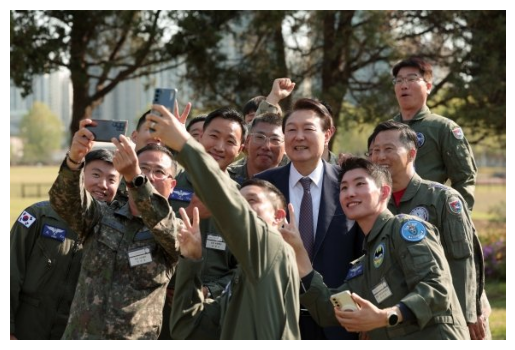

[News content]
 미국 국빈 방문을 마친 윤석열 대통령의 국정 지지율이 4주 만에 하락세를 멈추고 소폭 반등했다는 여론조사 결과가 1일 나왔다. 방미 성과를 고리로 국정 동력을 확보할지 주목되는 가운데 윤 대통령은 이날 근로자의 날을 맞아 노동개혁 의지를 표명하고 수단 교민 구출 작전인 프라미스 참가자들을 격려했다.

리얼미터가 미디어트리뷴 의뢰로 지난달 24~28일 전국 18세 이상 유권자 2507명을 대상으로 조사한 결과 윤 대통령의 국정 수행 긍정 평가는 34.5%, 부정 평가는 62.6%로 집계됐다. 지난주보다 긍정 평가는 1.9% 포인트 상승하고 부정 평가는 2.1% 포인트 하락한 수치다. 윤 대통령의 국정 지지율은 3월 5주차 이후 지난달에는 1주차 36.4%, 2주차 33.6%, 3주차 32.6%로 하락세를 이어 왔다.

배철호 리얼미터 수석전문위원은 이번 주 국정 지지율 평가는 오롯이 윤 대통령의 방미 활동에 대한 평가라 해도 무방하다며 국내외 화제가 되고 좋은 평가를 받았던 미 상, 하원 합동 연설은 윤 대통령에 대한 새로운 평가 근거로 등장했으며 지지율 상승에도 긍정적으로 작용할 것으로 전망한다고 설명했다. 이번 조사의 오차범위는 95% 신뢰수준에서 2.0% 포인트다. 무선, 유선 자동응답전화 방식으로 진행됐고 응답률은 3.2%다. 자세한 내용은 중앙선거여론조사심의위원회 홈페이지를 참조하면 된다.

국정 지지율이 반등한 이날 윤 대통령은 페이스북에 정부는 노동의 가치가 진정으로 존중받는 선진형 노사관계로 가기 위해 노동 약자 보호에 최선을 다할 것이라고 약속하며 3대 개혁 과제 중 우선 과제인 노동개혁의 고삐를 다시 쥐었다. 윤 대통령은 소수만이 기득권을 누린다면 그것은 자유가 아니라 특권이라면서 노동 약자를 보호하기 위해 노사법치주의를 확립하고, 우리 헌법 정신에 위배되는 기득권의 고용세습은 확실히 뿌리 뽑을 것이라고 강조했다. 그는 이어 더 많은 양질의 일자리가 창출되도록 글로벌 스탠더드에 맞게 노동을 유연화하고 노동시장의 이중

In [54]:
news = news_df.loc[0, :]

%matplotlib inline
# get image from image url
res = request.urlopen(news['image']).read()
# Image open
img = Image.open(BytesIO(res))

# news title
print(f"[News title]\n {news['title']}\n")
print(f"[News category]\n {news['category']}\n")
print(f"[News image]")
plt.axis('off')
plt.imshow(np.asarray(img))
plt.show()
print(f"[News content]\n {news['content']}\n")
print(f"[News url]\n {news['url']}")

__문단__ : 개행을 기준으로 나눌 예정

위 예시 기사에 대한 문단은 다음과 같이 분류된다

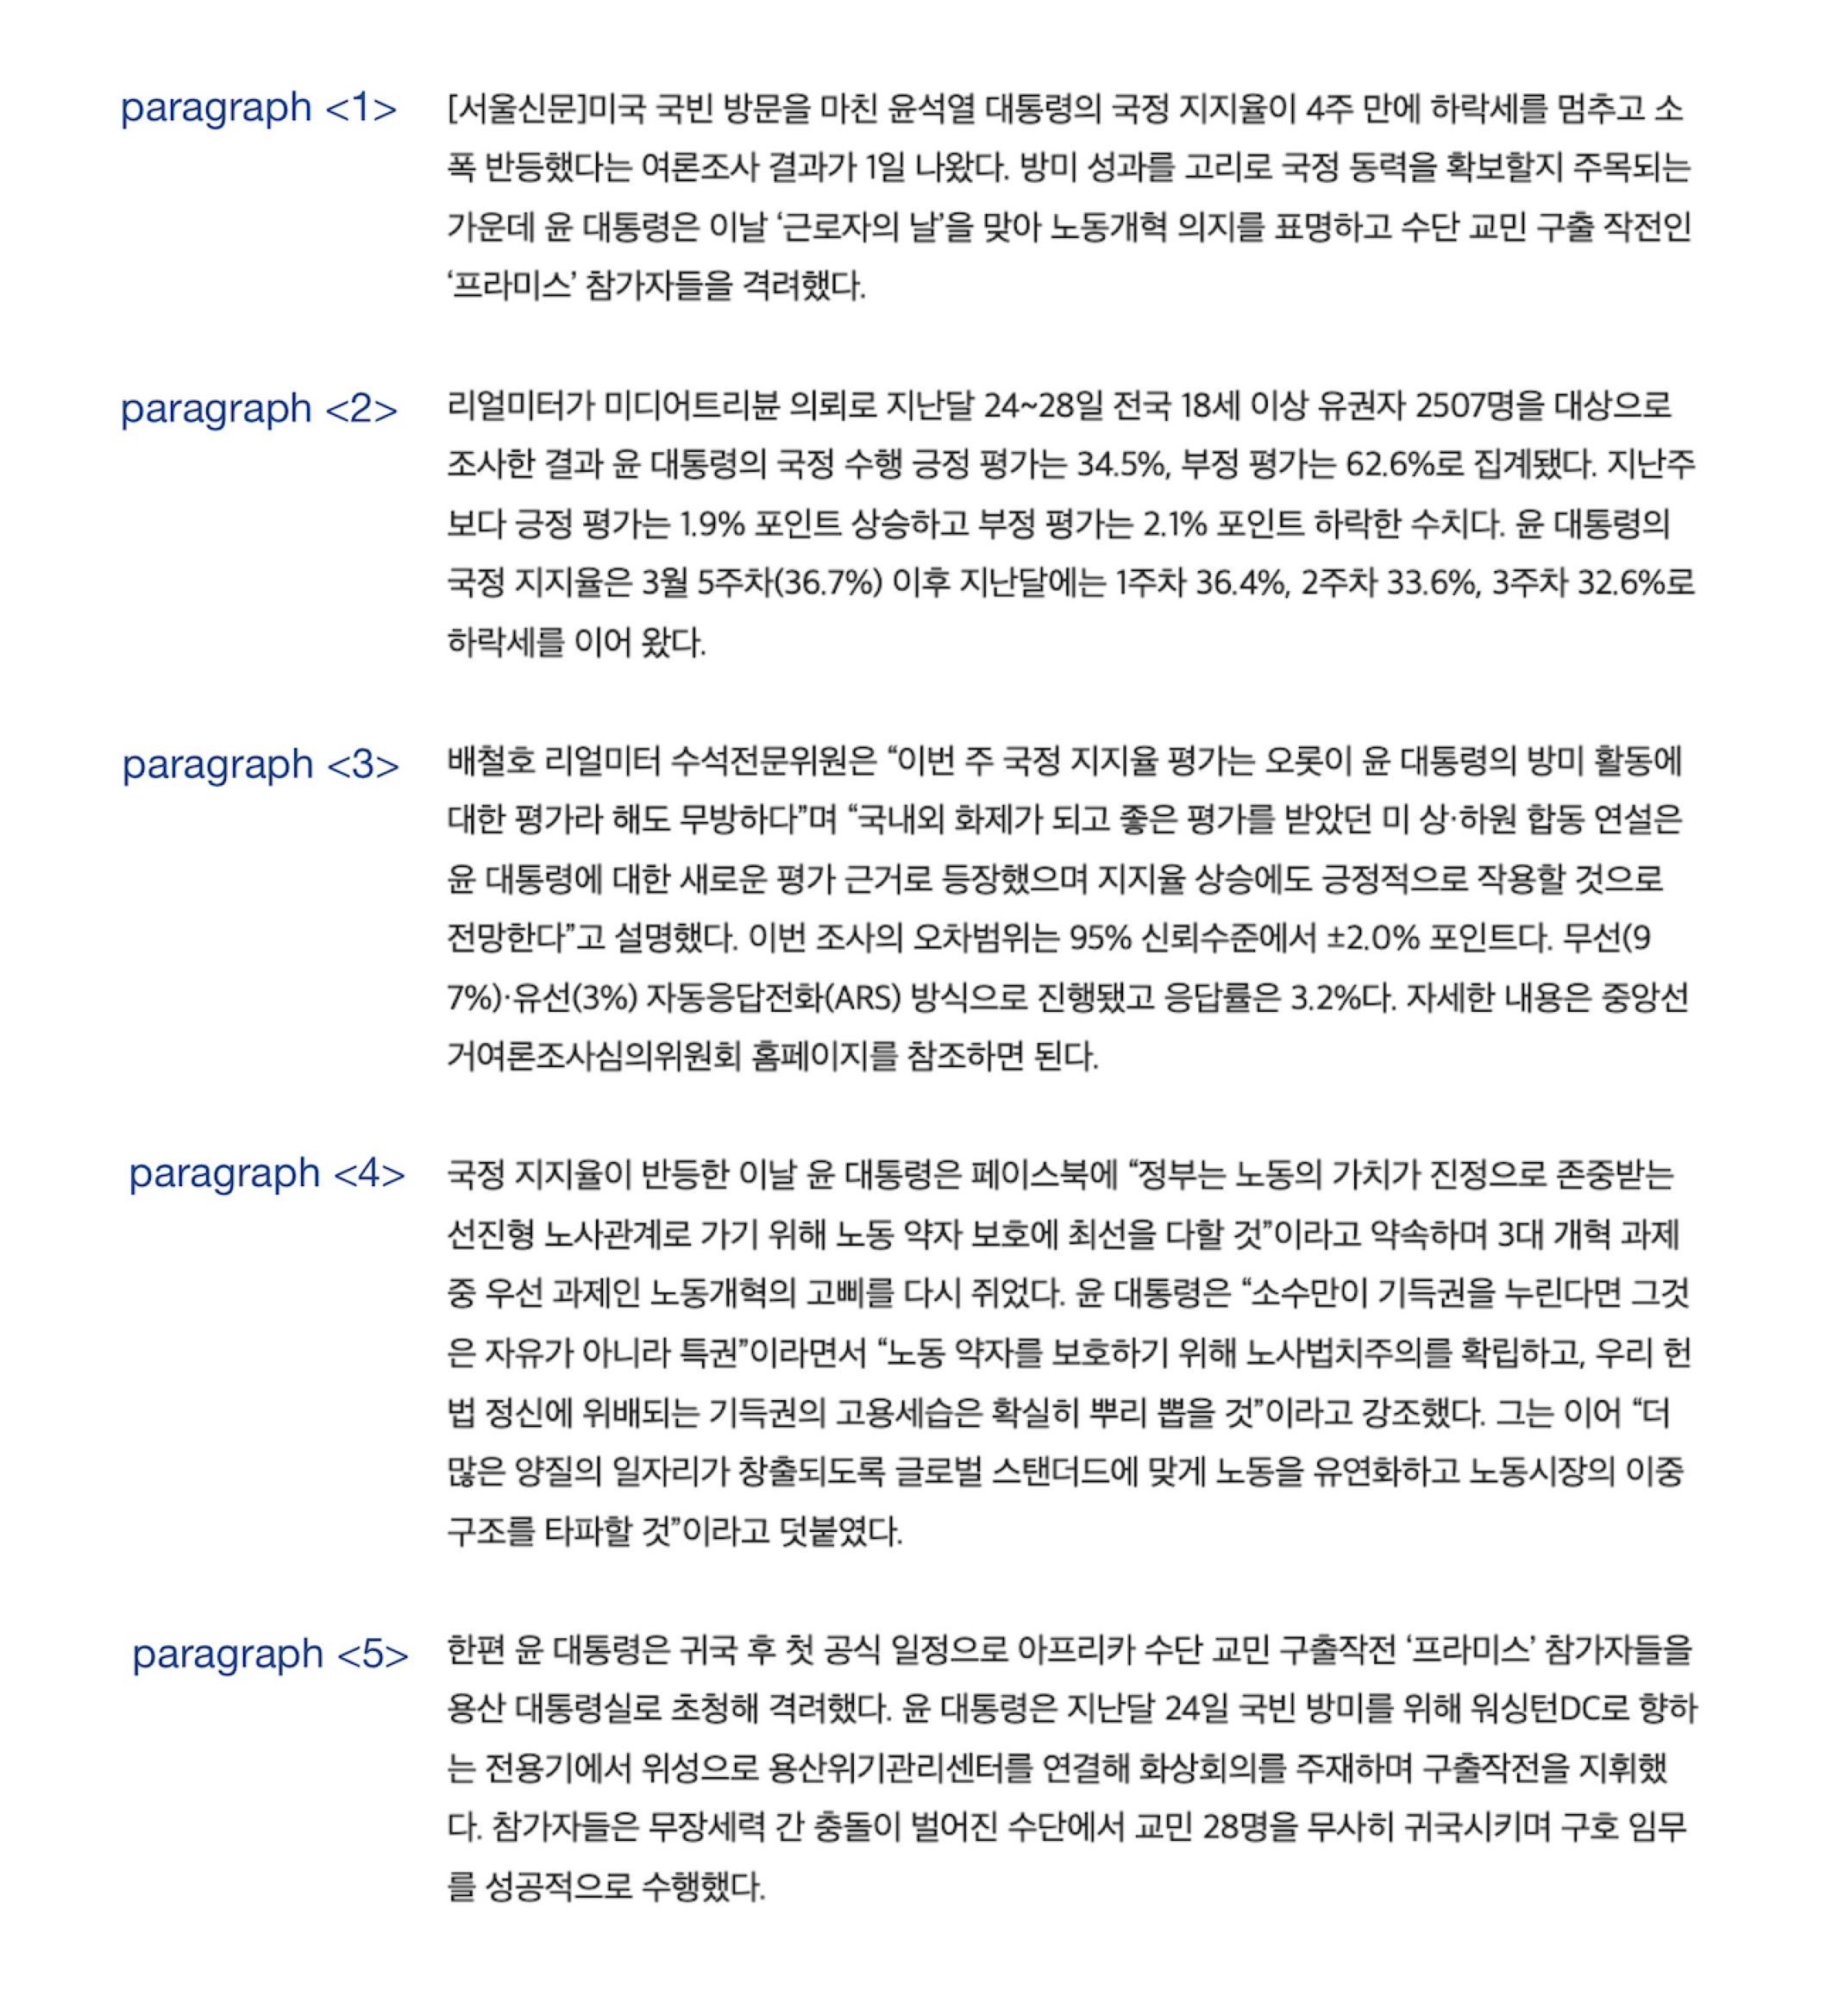

In [60]:
image_example = Image.open('example.png')
plt.rcParams['figure.dpi'] = 600
plt.axis('off')
plt.imshow(np.asarray(image_example))
plt.show()